In [4]:
def dfs(graph, vertex, visited, stack):
    visited.add(vertex)
    for neighbor in graph.neighbors_out(vertex):
        if neighbor not in visited:
            dfs(graph, neighbor, visited, stack)
    stack.append(vertex)

In [32]:
def find_scc(graph):
    visited = set()
    stack = []

    # First DFS to get finishing times
    for vertex in graph.vertices():
        if vertex not in visited:
            dfs(graph, vertex, visited, stack)

    # Transpose the graph
    transpose_graph = graph.reverse()

    # Reset visited set
    visited = set()

    # Perform DFS on the transpose graph using finishing times from the first pass
    scc_list = []
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            scc = []
            dfs(transpose_graph, vertex, visited, scc)
            scc_list.append(scc)

    return scc_list

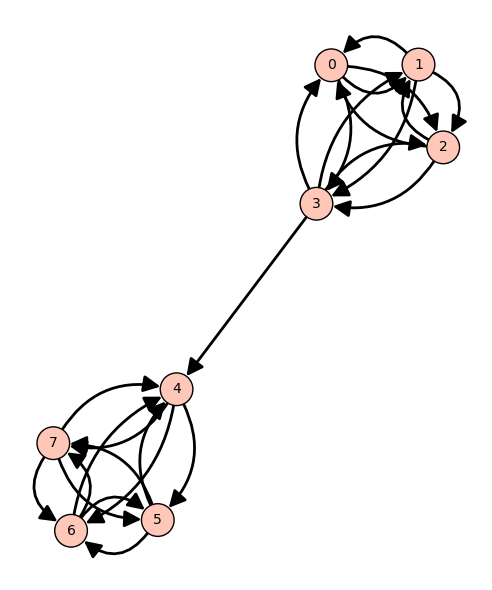

In [27]:
graph = DiGraph()

# Vertices for the SCCs
scc_1 = range(0, 4)  # Vertices for SCC 1
scc_2 = range(4, 8)  # Vertices for SCC 2

# Adding edges within each SCC
graph.add_edges([(u, v) for u in scc_1 for v in scc_1 if u != v])
graph.add_edges([(u, v) for u in scc_2 for v in scc_2 if u != v])

# Creating edges between SCCs
graph.add_edge(3, 4)  # Connecting SCC 1 and SCC 2

# Displaying the generated graph
graph.show(figsize=[6, 6])

In [33]:
scc = graph.strongly_connected_components()

# Print the strongly connected components
print("Strongly Connected Components:")
for component in scc:
    print(component)

Strongly Connected Components:
[4, 5, 6, 7]
[0, 1, 2, 3]


In [34]:
# Find Strongly Connected Components (SCCs)
scc_result = find_scc(graph)
print("Strongly Connected Components:")
print(scc_result)

Strongly Connected Components:
[[3, 2, 1, 0], [7, 6, 5, 4]]
